# Approaching the total heat flux using Gaussian Process Regression

227


/tmp/ipykernel_5696/1993392393.py:90: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ltd, final_sw_in*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged in sw')


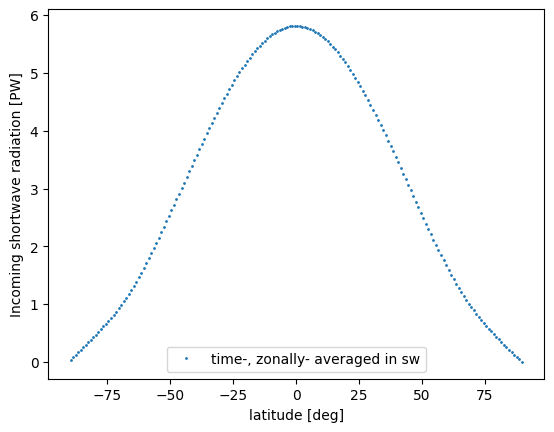

In [1]:
#Importing various packages
import os
import netCDF4 #(to open .nc files, numpy and netCDF libraries had to be installed first)
import numpy as np
import pandas as pd
import xarray as xr
from glob import glob
from scipy import integrate

#Defining the dataset. We want to calculate the meridional heat transport as: total transport= incoming shortwave radiation - (outgoing shortwave + outgoing longwave)

#Zonal and Time- average for the incoming shortwave radiation

#moving into the right folder:

os.chdir('/home/chrikap/Desktop/NASA CERES EBAF_all_latitudes/incoming solar')

#open all of the incoming sw rad. datasets (the ones that start with 'data_312b_Lot1_ceres-ebaf_tcdr_v4.1_solar_mon'):

filenames=glob('data_312b_Lot1_ceres-ebaf_tcdr_v4.1_solar_mon*.nc') 
print(np.size(filenames))                 #just to know how many datasets we have

sw = []                                   #list for the zonally-averaged values, calculated by integration
sw_mean = []                              #list for the zonally-averaged values, calculated by taking the mean along longtitude

for f in filenames:
    f = xr.open_dataset(f)
    
    lati = f.variables['lat']             # extracting latitude values
    lati = lati.values
    
    lon = f.variables['lon']              # extracting longitude values
    lon = lon.values
    #print(lon.shape)
    
    sw_in = f.variables['solar_mon']      # extracting incoming sw rad. values
    sw_in = sw_in.values
    #print(sw_in.shape)
    
    #zonal average for 1 month, using the trapezoid integration rule:
    
    zonal_sw_in = (integrate.cumulative_trapezoid(sw_in, x=lon, dx=1.0, axis=2, initial=0))/2*np.pi 
    zonal_sw_in = zonal_sw_in[:, :, 2]    # extracting the last column of the 3D-array
    #print(zonal_sw_in.shape)
    #print(zonal_sw_in)
    
    #zonal average for 1 month, taking the mean along longtitude:
    
    zonal_sw_in_mean = sw_in.mean(axis=2)
        
    #getting rid of the 'time' dimention of each month:
    
    time_sw_in = zonal_sw_in.mean(axis=0)

    time_sw_in_mean = zonal_sw_in_mean.mean(axis=0)
    
    #adding the final zonally- averaged value for each month in the list:
    
    sw.append(time_sw_in)
    
    sw_mean.append(time_sw_in_mean)
    
#turning the final lists into arrays:

sw = np.array(sw)

sw_mean = np.array(sw_mean)

#at this point, these arrays, contain all of the arrays with the zonally-averaged values vs. latitude, for each month.
#so, we average over all of the months:

sw_in_tot = sw.mean(axis=0)              #the total incoming sw rad. zonally averaged uding the trapezoid rule      
sw_in_tot_mean = sw_mean.mean(axis=0)    #the total incoming sw rad. zonally averaged by taking the mean

ltd=lati                                 #the latitude values to plot against

#now, we have expressed the heat transport in [W/m**2]. Yet, we need it in [PW], which means we have to multiply the value of every latitude band with the area of the band itself. So, let's go!

final_sw_in = np.zeros(180)

for i in range(180-1):
    R = 6371000                                #the radius of the Earth in [m]
    h1 = R*np.sin(ltd[i]*np.pi/180)            #the height of the first latitude circle
    h2 = R*np.sin(ltd[i+1]*np.pi/180)          #the height of the second latitude circle
    h = h2-h1                                  #the height of the band
    band_area = 2*np.pi*R*h                    #the area of the band
    final_sw_in[i] = band_area*sw_in_tot[i]    #the total heat flux for each latitude band

import matplotlib.pyplot as plt
plt.plot(ltd, final_sw_in*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged in sw')
#plt.plot(ltd, sw_in_tot_mean, label='time-, zonally- averaged in sw mean') #so, it's the same in shape but scaled
plt.xlabel('latitude [deg]')
plt.ylabel('Incoming shortwave radiation [PW]')
plt.legend()
plt.show()

265


/tmp/ipykernel_5696/4283149436.py:79: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ltd, final_lw_out*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged out lw')


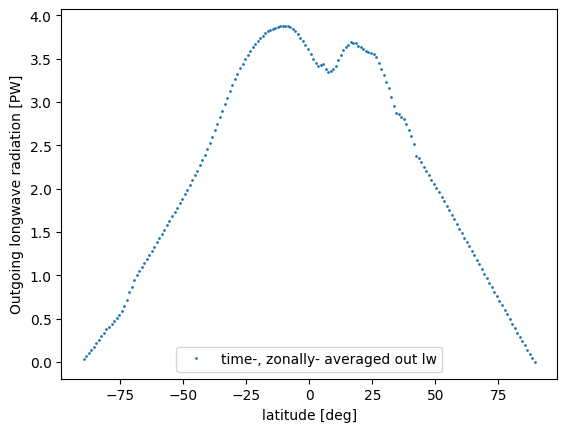

In [2]:
#Zonal and Time- average for the outgoing longwave radiation

#moving into the right folder:

os.chdir('/home/chrikap/Desktop/NASA CERES EBAF_all_latitudes/outgoing lw')

#open all of the outgoing lw rad. datasets:

filenames=glob('data_312b_Lot1_ceres-ebaf_tcdr_v4.1_toa_lw_all_mon*.nc') 
print(np.size(filenames))                      #just to know how many datasets we have

lw_out_list = []                               #list for the zonally-averaged values, calculated by integration
lw_out_mean_list = []                          #list for the zonally-averaged values, calculated by taking the mean along longtitude

for f in filenames:
    f = xr.open_dataset(f)
    
    lati = f.variables['lat']                 #extracting latitude values
    lati = lati.values
    
    lon = f.variables['lon']                  #extracting longitude values
    lon = lon.values
    #print(lon.shape)
    
    lw_out = f.variables['toa_lw_all_mon']    #extracting outgoing lw rad. values
    lw_out = lw_out.values
    #print(lw_out.shape)
    
    #zonal average for 1 month, using the trapezoid integration rule:
    
    zonal_lw_out = (integrate.cumulative_trapezoid(lw_out, x=lon, dx=1.0, axis=2, initial=0))/2*np.pi 
    zonal_lw_out = zonal_lw_out[:, :, 2]    # extracting the last column of the 3D-array
    #print(zonal_lw_out.shape)
    #print(zonal_lw_out)
    
    #zonal average for 1 month, taking the mean along longtitude:
    
    zonal_lw_out_mean = lw_out.mean(axis=2)
        
    #getting rid of the 'time' dimention of each month:
    
    time_lw_out = zonal_lw_out.mean(axis=0)

    time_lw_out_mean = zonal_lw_out_mean.mean(axis=0)
    
    #adding the final zonally- averaged value for each month in the list:
    
    lw_out_list.append(time_lw_out)
    
    lw_out_mean_list.append(time_lw_out_mean)
    
#turning the final lists into arrays:

lw_out = np.array(lw_out_list)

lw_out_mean = np.array(lw_out_mean_list)

#at this point, these arrays, contain all of the arrays with the zonally-averaged values vs. latitude, for each month.
#so, we average over all of the months:

lw_out_tot = lw_out.mean(axis=0)              #the total incoming sw rad. zonally averaged uding the trapezoid rule      
lw_out_tot_mean = lw_out_mean.mean(axis=0)    #the total incoming sw rad. zonally averaged by taking the mean

ltd=lati                                      #the latitude values to plot against

#now, we have expressed the heat transport in [W/m**2]. Yet, we need it in [PW], which means we have to multiply the value of every latitude band with the area of the band itself. So, let's go!

final_lw_out = np.zeros(180)

for i in range(180-1):
    R = 6371000                                #the radius of the Earth in [m]
    h1 = R*np.sin(ltd[i]*np.pi/180)            #the height of the first latitude circle
    h2 = R*np.sin(ltd[i+1]*np.pi/180)          #the height of the second latitude circle
    h = h2-h1                                  #the height of the band
    band_area = 2*np.pi*R*h     #the area of the band
    final_lw_out[i] = band_area*lw_out_tot[i]

import matplotlib.pyplot as plt
plt.plot(ltd, final_lw_out*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged out lw')
#plt.plot(ltd, lw_out_tot_mean, label='time-, zonally- averaged out lw mean') #so, it's the same in shape but scaled
plt.xlabel('latitude [deg]')
plt.ylabel('Outgoing longwave radiation [PW]')
plt.legend()
plt.show()

226


/tmp/ipykernel_5696/3081401252.py:79: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ltd, final_sw_out*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged out sw')


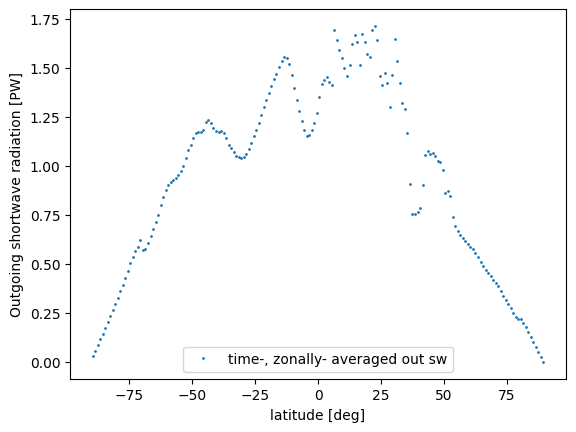

In [3]:
#Zonal and Time- average for the outgoing shortwave radiation

#moving into the right folder:

os.chdir('/home/chrikap/Desktop/NASA CERES EBAF_all_latitudes/outgoing sw')

#open all of the outgoing sw rad. datasets:

filenames=glob('data_312b_Lot1_ceres-ebaf_tcdr_v4.1_toa_sw_all_mon*.nc') 
print(np.size(filenames))                      #just to know how many datasets we have

sw_out_list = []                               #list for the zonally-averaged values, calculated by integration
sw_out_mean_list = []                          #list for the zonally-averaged values, calculated by taking the mean along longtitude

for f in filenames:
    f = xr.open_dataset(f)
    
    lati = f.variables['lat']                  #extracting latitude values
    lati = lati.values
    
    lon = f.variables['lon']                   #extracting longitude values
    lon = lon.values
    #print(lon.shape)
    
    sw_out = f.variables['toa_sw_all_mon']     #extracting outgoing sw rad. values
    sw_out = sw_out.values
    #print(sw_out.shape)
    
    #zonal average for 1 month, using the trapezoid integration rule:
    
    zonal_sw_out = (integrate.cumulative_trapezoid(sw_out, x=lon, dx=1.0, axis=2, initial=0))/2*np.pi 
    zonal_sw_out = zonal_sw_out[:, :, 2]    # extracting the last column of the 3D-array
    #print(zonal_sw_out.shape)
    #print(zonal_sw_out)
    
    #zonal average for 1 month, taking the mean along longtitude:
    
    zonal_sw_out_mean = sw_out.mean(axis=2)
        
    #getting rid of the 'time' dimention of each month:
    
    time_sw_out = zonal_sw_out.mean(axis=0)

    time_sw_out_mean = zonal_sw_out_mean.mean(axis=0)
    
    #adding the final zonally- averaged value for each month in the list:
    
    sw_out_list.append(time_sw_out)
    
    sw_out_mean_list.append(time_sw_out_mean)
    
#turning the final lists into arrays:

sw_out = np.array(sw_out_list)

sw_out_mean = np.array(sw_out_mean_list)

#at this point, these arrays, contain all of the arrays with the zonally-averaged values vs. latitude, for each month.
#so, we average over all of the months:

sw_out_tot = sw_out.mean(axis=0)              #the total incoming sw rad. zonally averaged uding the trapezoid rule      
sw_out_tot_mean = sw_out_mean.mean(axis=0)    #the total incoming sw rad. zonally averaged by taking the mean

ltd=lati                                      #the latitude values to plot against

#now, we have expressed the heat transport in [W/m**2]. Yet, we need it in [PW], which means we have to multiply the value of every latitude band with the area of the band itself. So, let's go!

final_sw_out = np.zeros(180)

for i in range(180-1):
    R = 6371000                                #the radius of the Earth in [m]
    h1 = R*np.sin(ltd[i]*np.pi/180)            #the height of the first latitude circle
    h2 = R*np.sin(ltd[i+1]*np.pi/180)          #the height of the second latitude circle
    h = h2-h1                                  #the height of the band
    band_area = 2*np.pi*R*h                    #the area of the band
    final_sw_out[i] = band_area*sw_out_tot[i]

import matplotlib.pyplot as plt
plt.plot(ltd, final_sw_out*10**-15, 'o', marker=".", markersize=2, label='time-, zonally- averaged out sw')
#plt.plot(ltd, sw_out_tot_mean, label='time-, zonally- averaged out sw mean') #so, it's the same in shape but scaled
plt.xlabel('latitude [deg]')
plt.ylabel('Outgoing shortwave radiation [PW]')
plt.legend()
plt.show()

/tmp/ipykernel_5696/3478583323.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(ltd, total*10**-15,'o', marker=".", markersize=2, label='time-, zonally- averaged h.t.')


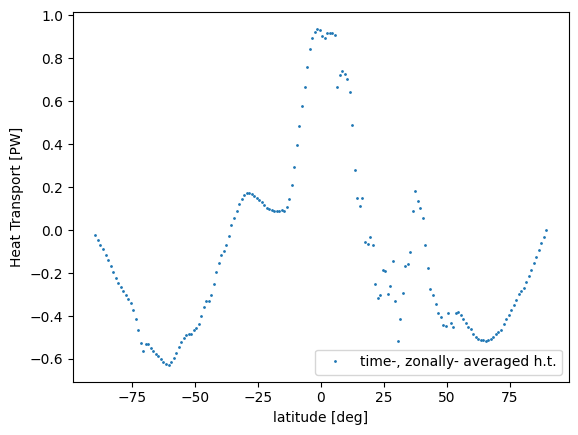

In [6]:
#Total heat transport, zonally- and time- averaged:

total= final_sw_in - (final_sw_out +final_lw_out)
#total_mean= sw_in_tot_mean - (sw_out_tot_mean + lw_out_tot_mean)

import matplotlib.pyplot as plt
plt.plot(ltd, total*10**-15,'o', marker=".", markersize=2, label='time-, zonally- averaged h.t.')
#plt.plot(ltd, total_mean, label='time-, zonally- averaged h.t. mean') #so, it's the same in shape but scaled
plt.xlabel('latitude [deg]')
plt.ylabel('Heat Transport [PW]')
plt.legend()
plt.show()

In [4]:
# code borrowed from: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#dataset-generation

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

x=ltd.reshape(-1, 1)
target=(total*10**-15)

X_train, X_test, t_train, t_test = train_test_split(x, target, test_size=0.25, random_state=42) #can change teh test size 

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, t_train)
gaussian_process.kernel_

/home/chrikap/anaconda3/envs/compsci2/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.304**2 * RBF(length_scale=1.56)

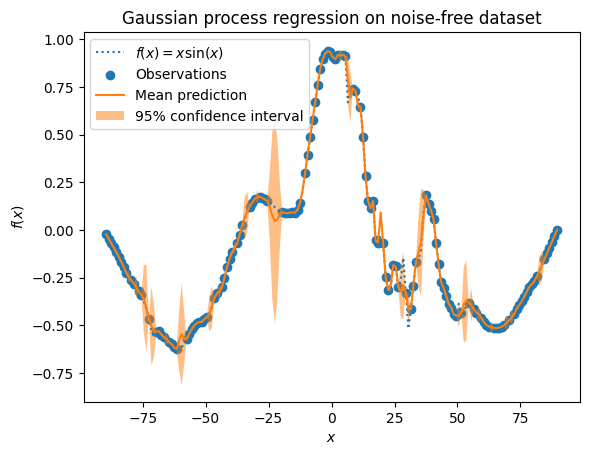

In [9]:
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)


plt.plot(x, target, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, t_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")